In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')      # 124M parameters
sd_hf = model_hf.state_dict()


for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf['transformer.wte.weight']

tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]])

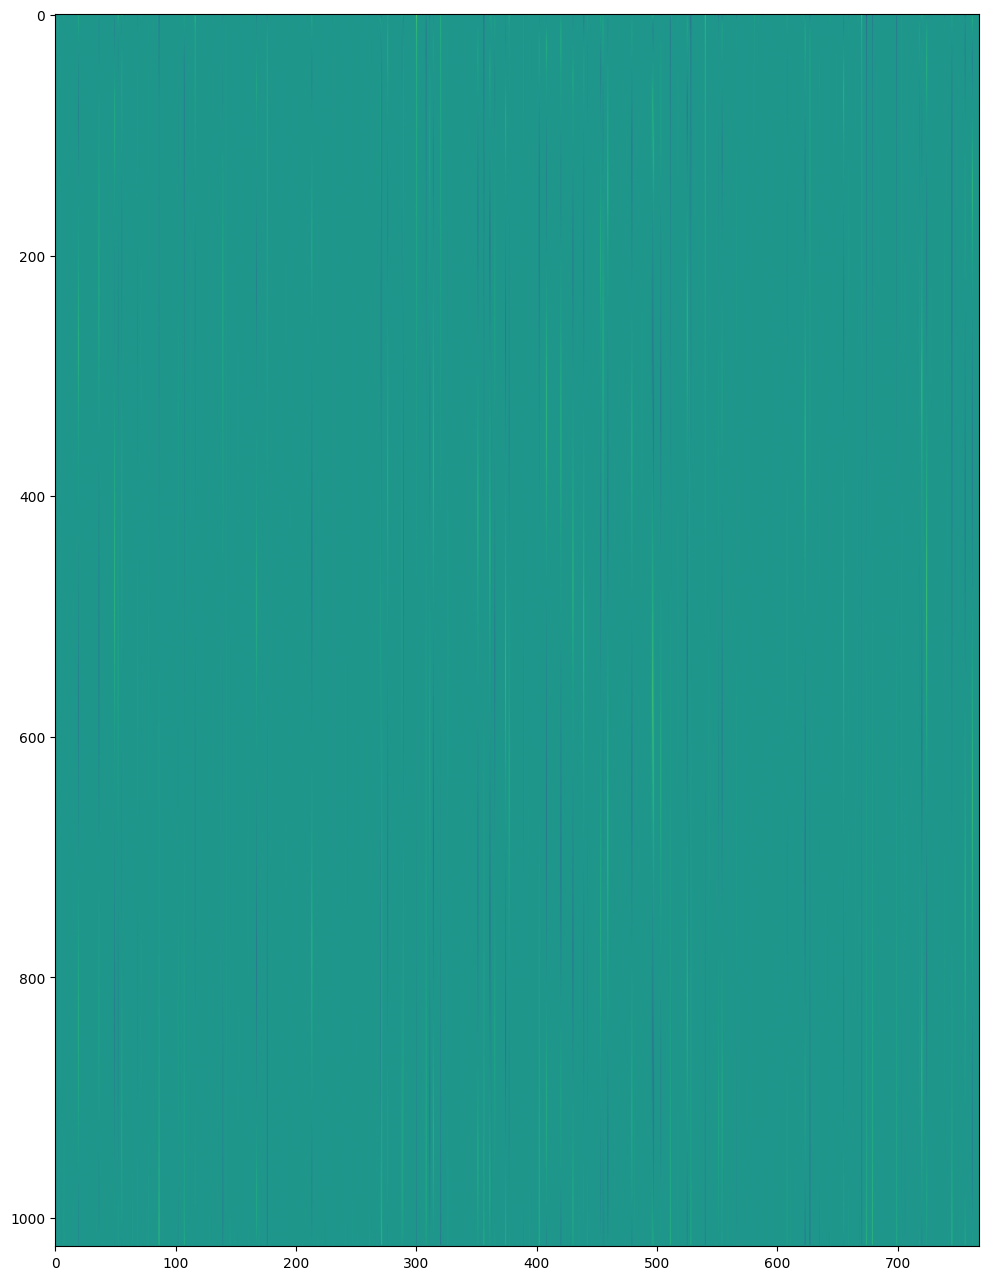

In [4]:
plt.figure(figsize=(16, 16))
plt.imshow(sd_hf['transformer.wpe.weight']);

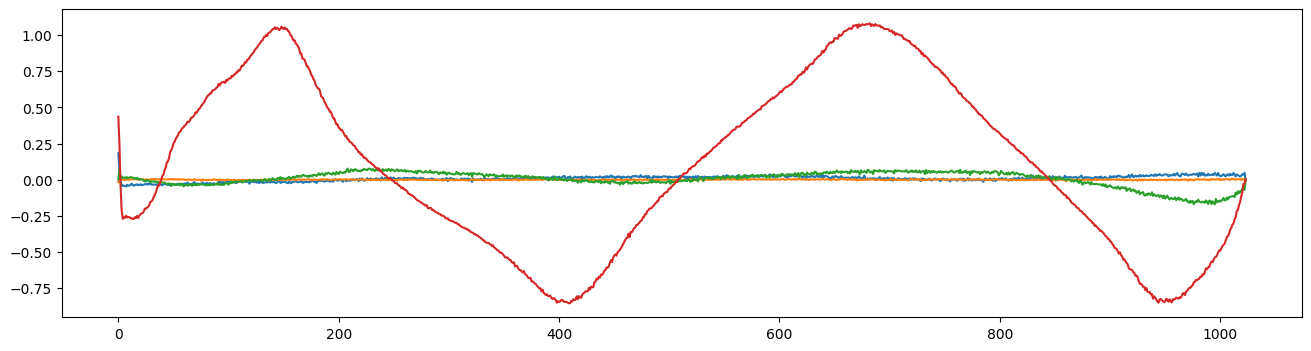

In [5]:
plt.figure(figsize=(16, 4))
plt.plot(sd_hf['transformer.wpe.weight'][:, torch.randint(0, sd_hf['transformer.wpe.weight'].shape[-1], (4, ))]);

In [6]:
sd_hf['lm_head.weight']

tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]])

In [7]:
from transformers import pipeline, set_seed

set_seed(2147483647)
generator = pipeline('text-generation', model='gpt2')
generator('hello, world!', max_length=32, num_return_sequences=8)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "hello, world!\n\nIf you love what you read, check out all of my other books. You like mine? Then you'll really like what you"},
 {'generated_text': 'hello, world!\n\n\nPlease see the note about having to buy any sort of car. As of May of 2012 it is $10,000 less a'},
 {'generated_text': "hello, world! A quick look at your current position.\n\nA brief aside: You're still probably fine. The weather seems to be turning as you"},
 {'generated_text': "hello, world! You're welcome and thanks!\n\n\nYour work, for those who aren't even in New York City right now, is so awesome."},
 {'generated_text': "hello, world!\n\n\nI'm just giving the game a go with an extra couple dollars for my next purchase.\n\n\nBest regards!"},
 {'generated_text': 'hello, world!\n\n\nThere are three main things missing from the campaign:\n\n\n(1) money\n\n(2) time\n\n\nThe campaign'},
 {'generated_text': 'hello, world! It was a lovely Sunday. Our group got off on a good run. We got our breakfast a